How does a neural net really work?
https://www.kaggle.com/code/jhoward/how-does-a-neural-net-really-work



In [1]:
from fastai.basics import *
from ipywidgets import interact

plt.rc('figure', dpi=90)


def plot_function(f, title=None, min=-3, max=3, color='r', ylim=None):
    x = torch.linspace(min, max, 100)[:, None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

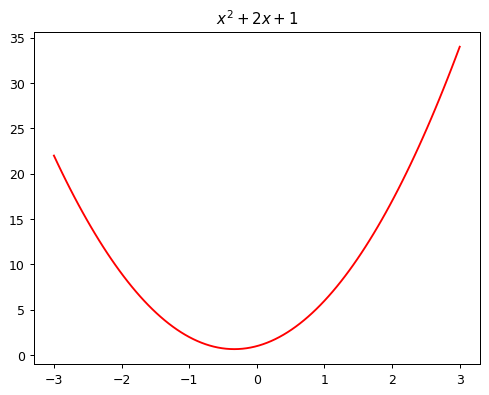

In [2]:
def f(x): return 3 * x ** 2 + 2 * x + 1


plot_function(f, "$x^2 + 2x + 1$")

In [3]:
def quad(a, b, c, x): return a * x ** 2 + b * x + c


In [4]:
def make_quad_fun(a, b, c): return partial(quad, a, b, c)


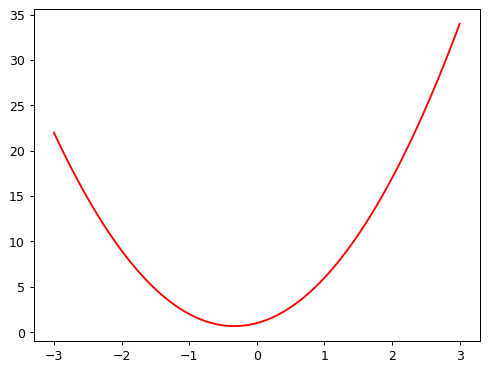

In [11]:
f2 = make_quad_fun(3, 2, 1)
plot_function(f2)

In [6]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)


def add_noise(x, mult, add): return x * (1 + noise(x, mult)) + noise(x, add)

In [7]:
np.random.seed(42)

x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x), 0.15, 1.5)

/tmp/ipykernel_1350878/4211652469.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  def add_noise(x, mult, add): return x * (1 + noise(x, mult)) + noise(x, add)


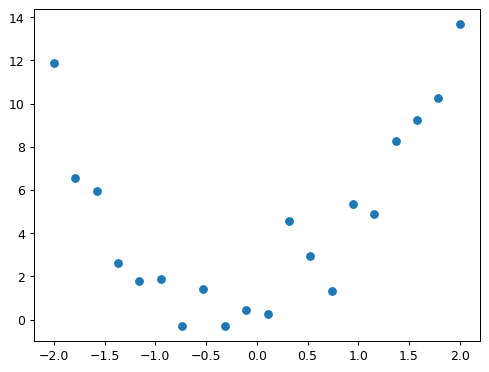

In [29]:
plt.scatter(x, y);


In [8]:
def mae(preds, acts): return (torch.abs(preds - acts)).mean()


@interact(a=2.1, b=1.3, c=1)
def plot_quad(a, b, c):
    f = make_quad_fun(a, b, c)
    plt.scatter(x, y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3, 12), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=2.1, description='a', max=6.300000000000001, min=-2.1), FloatSlider(va…

In [9]:
def quad_mae(params):
    f = make_quad_fun(*params)
    return mae(f(x), y)

In [10]:
abc = torch.tensor([1.1, 1.1, 1.1])
## init the a,b,c param with random values

In [37]:
abc.requires_grad_()


tensor([1.1000, 1.1000, 1.1000], requires_grad=True)

In [40]:
loss = quad_mae(abc)
loss

tensor(2.4219, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [55]:
for i in range(10):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad * 0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=1.77
step=1; loss=1.59
step=2; loss=1.41
step=3; loss=1.27
step=4; loss=1.16
step=5; loss=1.09
step=6; loss=1.03
step=7; loss=1.06
step=8; loss=1.16
step=9; loss=1.34
